# 'Exploratory Data Analysis on IPL 2020 Tweets' 📈

The Indian Premier League (IPL) is a professional men's Twenty20 cricket league, contested by ten teams based out of ten Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

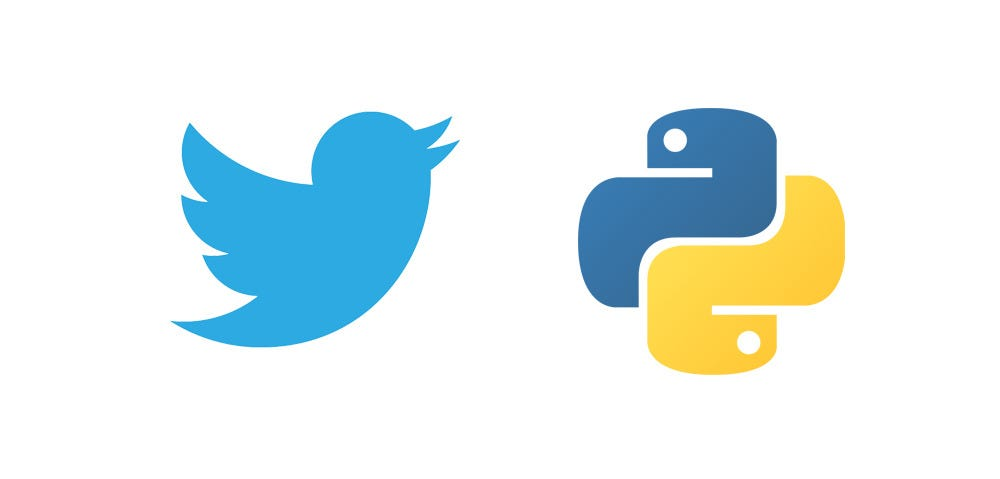

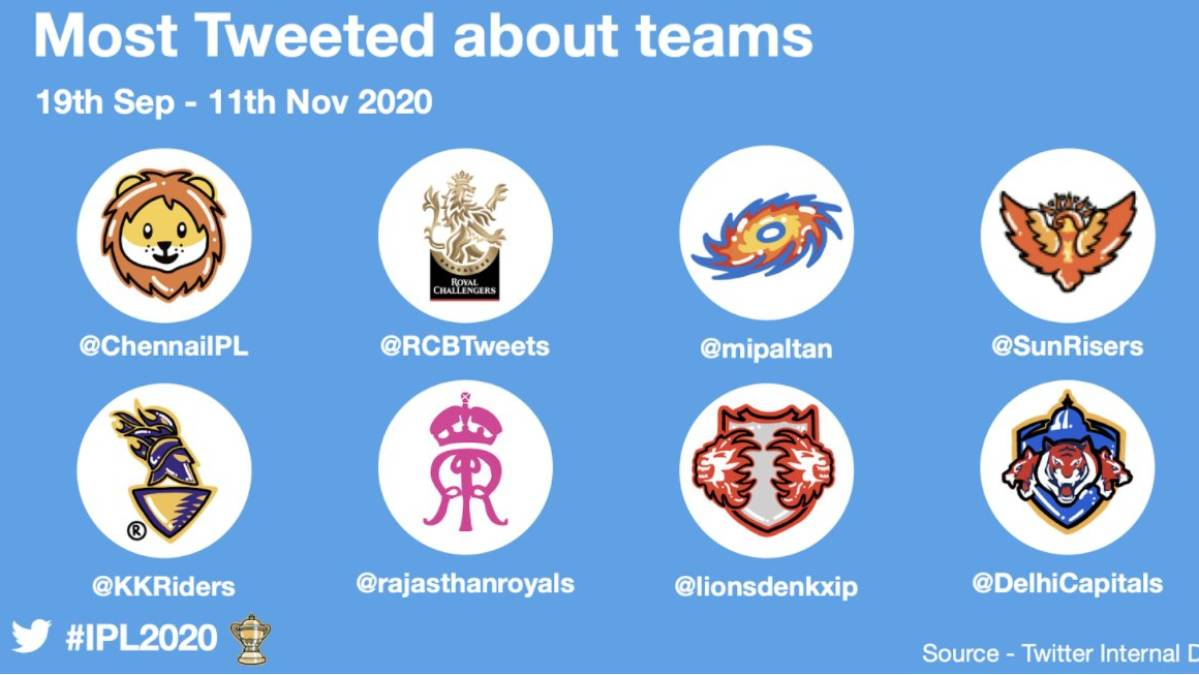

Below the all 8 IPL 2020 Team squad,

- Chennai Super Kings
- Royal Challengers Bangalore
- Delhi Capital
- Mumbai Indians
- Kolkata Knight Riders
- Rajasthan Royals
- Kings XI Punjab
- Sunrisers Hyderabad
- Team Ahmedabad (New entry in 2022)
- Team Lucknow (New entry in 2022)

# What is Exploratory Data Analysis for ?
![EDA](https://drive.google.com/uc?id=1x0qPGoV3KVMecqZrOHhpoy_0M2yCeEVx)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

Below are the outline as well as squential steps taken to dig down to dataset:

1. Installation of required packages and their upgradation (if required).

2. Downloading the dataset from kaggle with the help of Kaggle account credential like username and api token.

3. Performing data preparation and cleaning with Pandas.

4. Open ended exploratory analysis & visualisation on columns.

5. Asking & Answering Questions.

6. Summarizing inferences and drawing conclusions.

This data consists of the tweets with the trending #ipl2020 hashtags made by the fans of cricket

The data is extracted using TwitterAPI and a python script! Please refer to this notebook for the data extraction process https://www.kaggle.com/kaushiksuresh147/twitter-data-extraction-for-ipl2020. The data will be updated on a daily basis.

# System Setup
List of all the python libraries that are required

- numpy
- pandas
- matplotlib
- seaborn
- wordcloud
- emoji
- jovian

Run the following command to get all the listed python libraries.

pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade

To check whether do you all the required libraries the next should run without any errors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Downloading the dataset from kaggle

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/kaushiksuresh147/ipl2020-tweets/download?datasetVersionNumber=69'
od.download(download_url)


100%|██████████| 161M/161M [00:01<00:00, 90.1MB/s]


In [ ]:
data_filename = './ipl2020-tweets/IPL2020_Tweets.csv'

## Data Cleaning

In [ ]:
df = pd.read_csv(data_filename)

<ipython-input-5-365f135f3c5b>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_filename)


In [ ]:
df.describe()

,user_followers,user_friends,user_favourites,month,year
count,5.729630e+05,572963.000000,5.729630e+05,572963.000000,572963.0
mean,1.284920e+05,655.972527,1.255185e+04,9.624279,2020.0
std,8.037701e+05,1855.280140,2.978029e+04,0.767528,0.0
min,0.000000e+00,0.000000,0.000000e+00,8.000000,2020.0
25%,5.800000e+01,96.000000,2.410000e+02,9.000000,2020.0
50%,3.170000e+02,297.000000,1.962000e+03,10.000000,2020.0
75%,1.888000e+03,703.000000,1.014900e+04,10.000000,2020.0
max,3.444460e+07,309144.000000,1.265087e+06,11.000000,2020.0


## **Percentage of missing values per column**

In [ ]:
Available_values=df.notnull().sum().sort_values(ascending = True)
Available_values

user_location       430627
hashtags            462876
user_description    525288
source              572849
is_retweet          572959
user_name           572963
user_created        572963
user_followers      572963
user_friends        572963
user_favourites     572963
user_verified       572963
date                572963
text                572963
month               572963
year                572963
dtype: int64

### ***Let's Find out the missing values.***

Text(0.5, 1.0, 'Percentage of missing values')

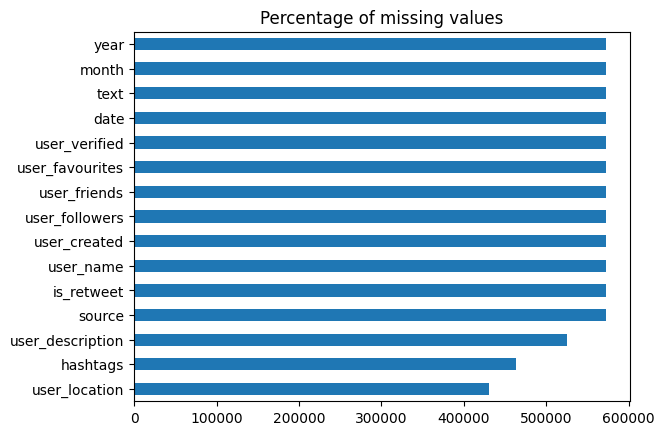

In [ ]:
Available_values.plot(kind='barh');
plt.title('Percentage of missing values')

The horizontal bar chart displays various columns or features in the dataset on the vertical axis (y-axis). Each bar represents a different column, and the length of the bar indicates the percentage of missing values in that column.

## Open-ended exploratory analysis and visualization
The data analysis helps us to understand the situation deeply, by digging into the data, so that we can find the "gold" in the data "mine" and tell the hidden stories. Meanwhile, data visualization empowers us to communicate stories more effectively.

### Top 10 user with the most tweets during the ipl 2020 season.

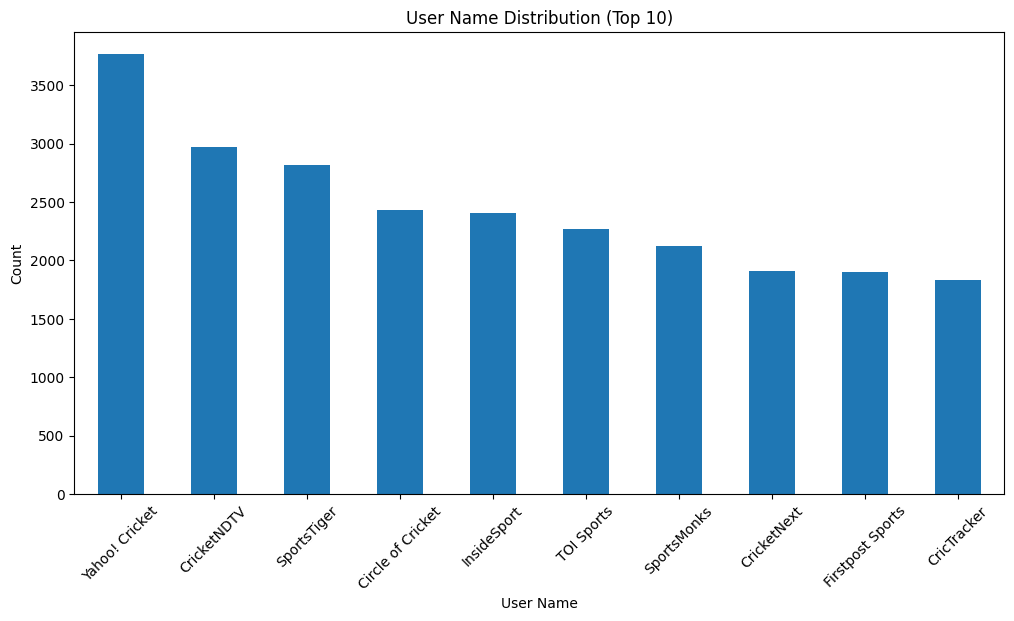

In [ ]:
# Calculate the count of each unique user name
user_name_counts = df['user_name'].value_counts()

# Choose the top N user names to display on the chart (you can change the number)
top_n = 10
top_user_names = user_name_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_user_names.plot(kind='bar')
plt.title('User Name Distribution (Top {})'.format(top_n))
plt.xlabel('User Name')
plt.ylabel('Count')

# Customize the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


- As we can Yahoo! cricket leads the chart , follwed by other channels.
- It as almost around 4000 tweets.

### Explore Relationships Using Bar Charts:

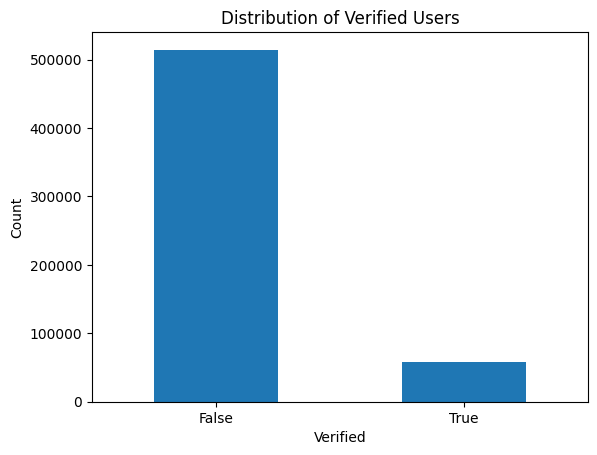

In [ ]:
# Bar chart for 'user_verified' distribution
verified_counts = df['user_verified'].value_counts()
verified_counts.plot(kind='bar', rot=0)
plt.xlabel('Verified')
plt.ylabel('Count')
plt.title('Distribution of Verified Users')
plt.show()

A significant portion of users in the dataset are not verified, with a smaller proportion being verified accounts.

### **Correlation between Numeric Columns**

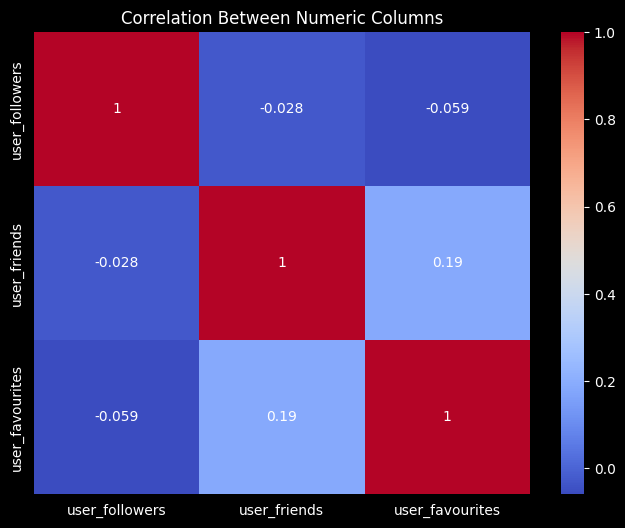

In [ ]:
# Define the numeric columns you want to include in the correlation analysis
numeric_columns = ['user_followers', 'user_friends', 'user_favourites']

# Heatmap to visualize the correlation between numeric columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Columns')
plt.show()

The heatmap provides a visual representation of how strongly and in what direction (positive or negative) the selected numeric columns are correlated. It helps you identify relationships between these columns, which can be valuable for data analysis and decision-making.

### **What is the distribution of user verification status?**

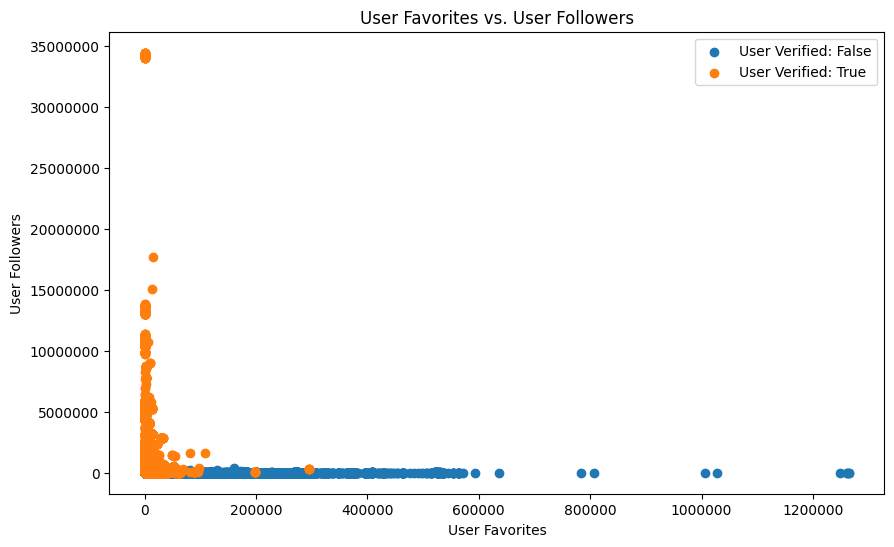

In [ ]:
# Create a scatter plot for each category of 'user_verified'
plt.figure(figsize=(10, 6))

for verified_status in df['user_verified'].unique():
    data = df[df['user_verified'] == verified_status]
    plt.scatter(data['user_favourites'], data['user_followers'], label=f'User Verified: {verified_status}')

# Set the axis labels
plt.xlabel('User Favorites')
plt.ylabel('User Followers')

# Set the plot title
plt.title('User Favorites vs. User Followers')

# Format tick labels to show numbers, not in exponential notation
plt.ticklabel_format(style='plain', axis='both')

# Add a legend to differentiate the categories
plt.legend()

# Show the plot
plt.show()


The plots can help identify outliers or extreme cases, such as users with an unusually high number of favorites or followers. These outliers may be influential or interesting in the context of the analysis.

### Does Twitter verification status influence follower count distribution, and are there significant differences between verified and non-verified users' follower counts?

In [ ]:
verification_status = df['user_verified'].value_counts()
print(verification_status)


False    514564
True      58399
Name: user_verified, dtype: int64


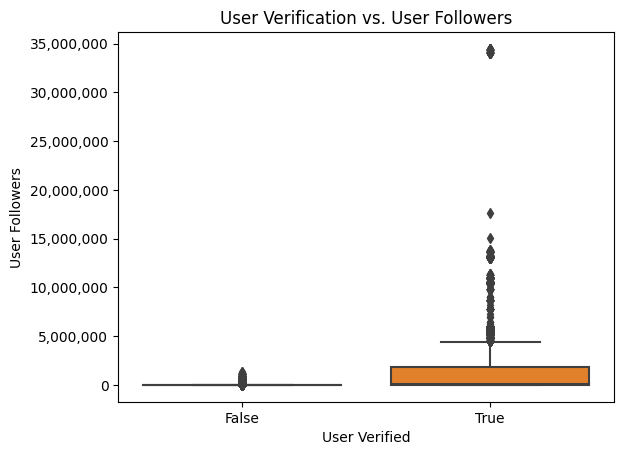

In [ ]:
import matplotlib.ticker as ticker  # Import the ticker module
# Create the box plot
sns.boxplot(x='user_verified', y='user_followers', data=df)

# Set the axis labels
plt.xlabel('User Verified')
plt.ylabel('User Followers')

# Set the plot title
plt.title('User Verification vs. User Followers')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Show the plot
plt.show()

 By creating box plots for both categories, the question explores whether verified users tend to have higher or lower follower counts compared to non-verified users.

 ## Asking & Answering Questions About the Data

### **1.What's the percentage of verified and non verified users platflorm to use twitter?**

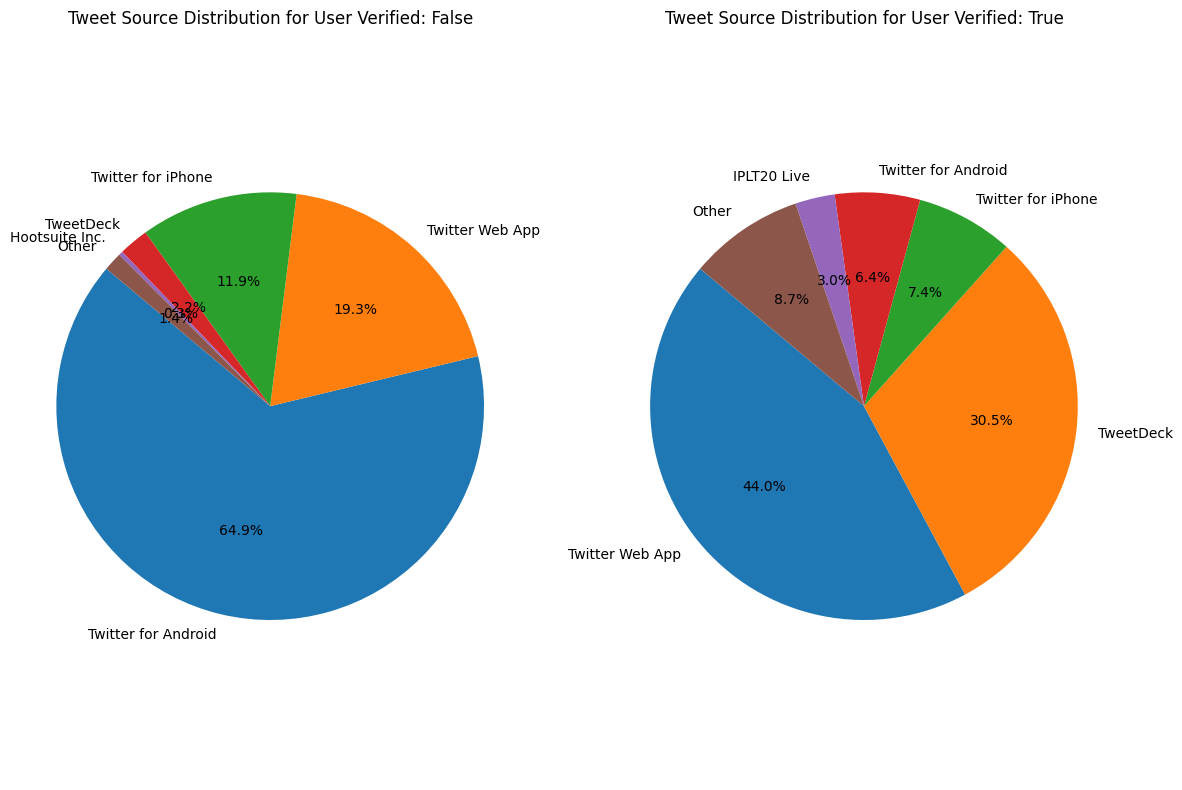

In [ ]:
# Calculate the distribution of tweet sources for each user_verified category
verified_categories = df['user_verified'].unique()
plt.figure(figsize=(12, 8))

for verified_status in verified_categories:
    source_counts = df[df['user_verified'] == verified_status]['source'].value_counts()

    # Keep the top N sources and group others into 'Other' for a cleaner pie chart
    top_n = 5  # You can change this number to show the top N sources
    top_sources = source_counts.head(top_n)
    other_sources = source_counts.iloc[top_n:]
    if len(other_sources) > 0:
        top_sources['Other'] = other_sources.sum()

    # Plot a pie chart for tweet sources
    plt.subplot(1, len(verified_categories), list(verified_categories).index(verified_status) + 1)
    plt.pie(top_sources, labels=top_sources.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tweet Source Distribution for User Verified: {verified_status}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.tight_layout()
plt.show()

- Basically we can see non-verified users use andriod application for tweets.
- On the other hand the verified users tends to use twitter web app for expressing there view.

### **2.Can you analyse the sentitment of the user during the match?**

In [ ]:
pip install textblob

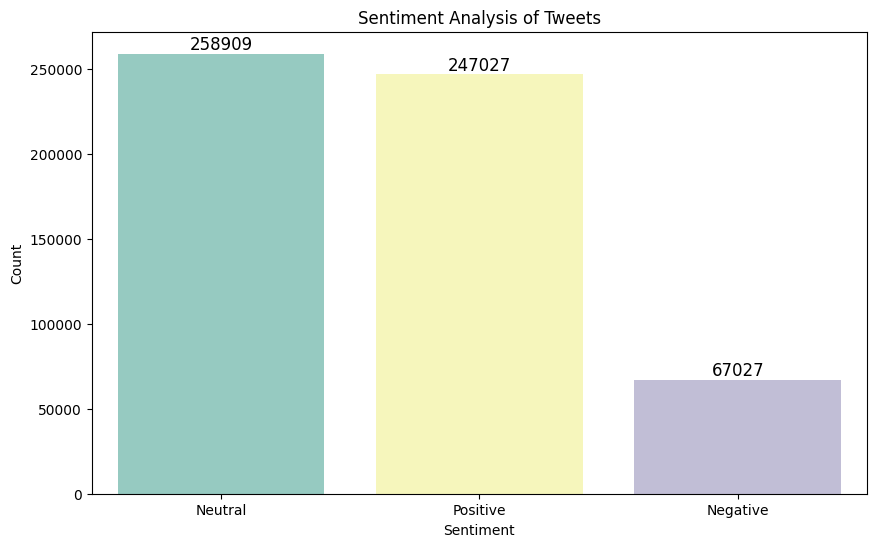

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to get sentiment polarity (positive, negative, or neutral)
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to each tweet
df['sentiment'] = df['text'].apply(get_sentiment)

# Count the number of tweets in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar chart for sentiment distribution with a color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set3")
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add annotations to the bars for better clarity
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


So here we can clearly most time the tweets are having a neutral / postive sentiments towards the match , which is a very good sign considering the whole fan wars on the social medias .

### **3. What is the distribution of user locations?Where are the more active user of twitter during ipl season?**

In [ ]:
location_distribution = df['user_location'].value_counts().head(10)  # Top 10 locations
print(location_distribution)

India               62202
Mumbai, India       23704
New Delhi, India    16442
Hyderabad, India    11669
Bengaluru, India     8086
Chennai, India       7608
Mumbai               6739
Pune, India          4835
New Delhi            4125
Kolkata, India       3984
Name: user_location, dtype: int64


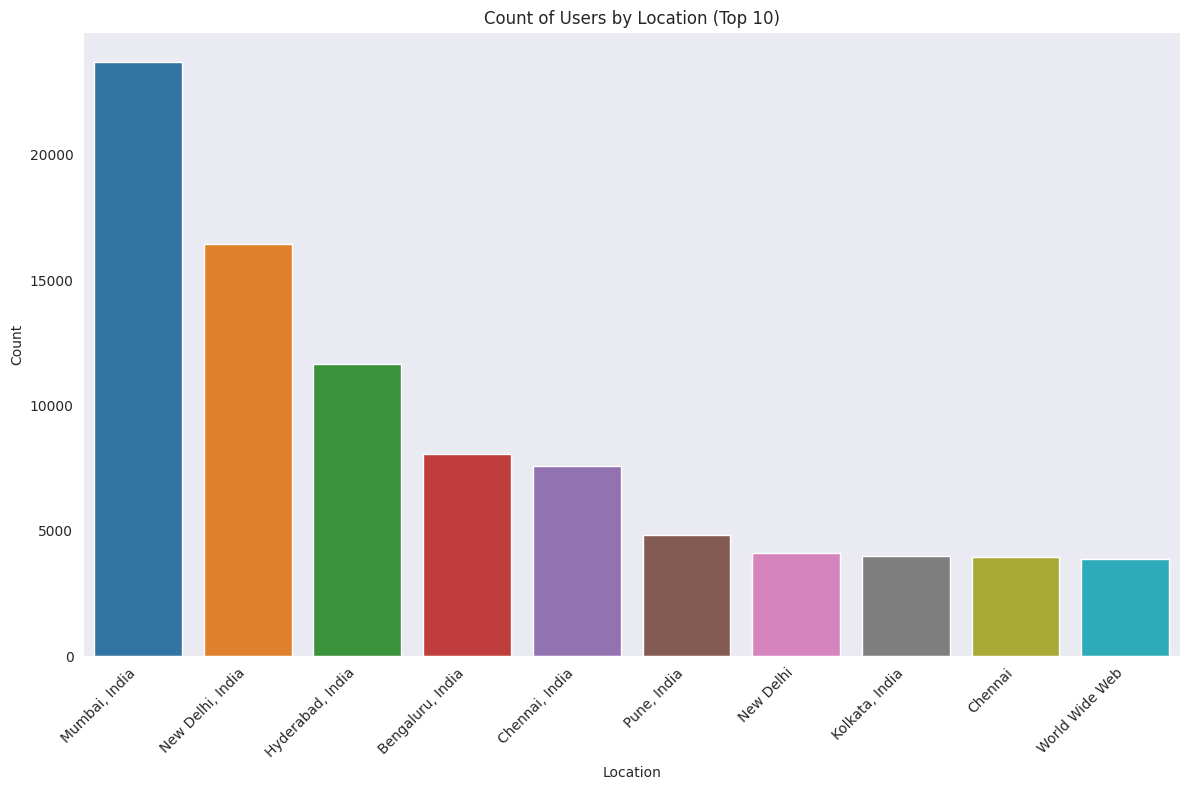

In [ ]:
excluded_locations = ['India','Mumbai']

# Filter rows with non-null user location
filtered_df = df[df['user_location'].notnull() & ~df['user_location'].isin(excluded_locations)]


# Count the occurrences of each location
location_counts = filtered_df['user_location'].value_counts()

# Sort the locations based on count in descending order
location_counts = location_counts.sort_values(ascending=False)

# Set the dark background
sns.set_style('dark')

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10])
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Users by Location (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

- We are excluding india because we want to anaylse ,where the tweets are coming from different location of India.
- So the higest tweets comes from Mumbai.

### **4.Give a rough estimate of Tweets from each sources and there numbers?Who can basically use twitter app more?**

In [ ]:
source_distribution = df['source'].value_counts().head(10)  # Top 10 sources
print(source_distribution)


Twitter for Android     337491
Twitter Web App         124775
Twitter for iPhone       65484
TweetDeck                29391
Hootsuite Inc.            1957
IPLT20 Live               1748
Twitter for iPad          1584
Buffer                    1515
Twitter Media Studio      1447
IFTTT                      788
Name: source, dtype: int64


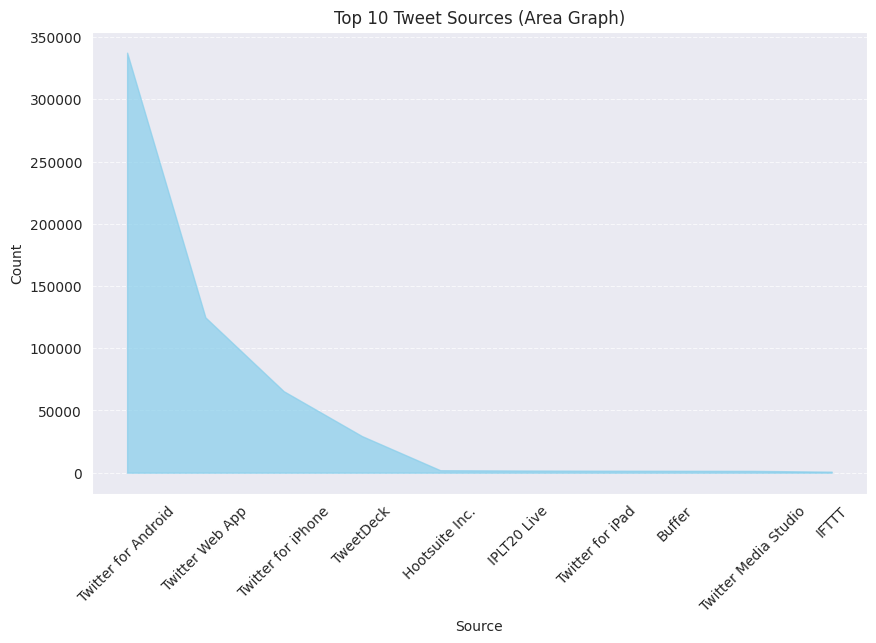

In [ ]:
# Assuming you already have 'source_distribution' calculated
source_distribution = df['source'].value_counts().head(10)  # Top 10 sources

# Create an area graph to visualize the distribution of tweet sources
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the area graph
plt.fill_between(source_distribution.index, source_distribution.values, alpha=0.7, color='skyblue')

plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Top 10 Tweet Sources (Area Graph)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- So pepole tweeting from android is more then any other sources.
- So avg around 3.5m people tweets from Android , and the number decrease as the sources changes.
- So here the twitter app can target iphone user to spend more time on twiiter to increase there usablity.

### **5. What is the distribution of tweet creation years?Which month people are more active in India?Which month you can promote more business ads?**

---



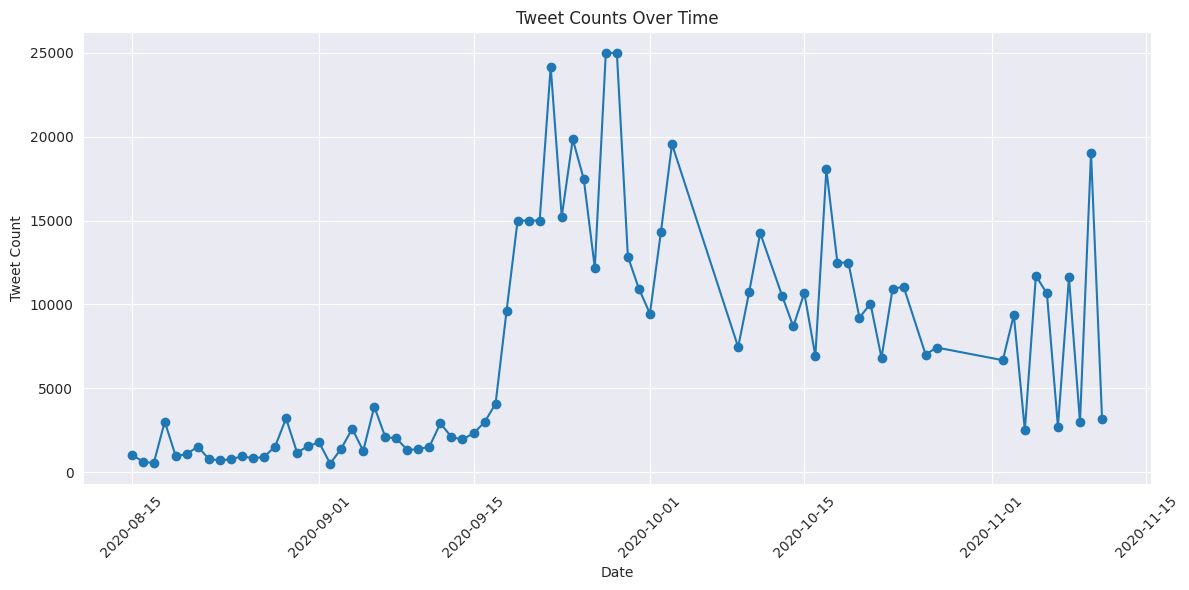

In [ ]:
# Ensure the 'date' column is recognized as a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of tweets for each date
tweet_counts_by_date = df.groupby(df['date'].dt.date).size()

# Create a time series line chart
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts_by_date.index, tweet_counts_by_date.values, marker='o', linestyle='-')
plt.title('Tweet Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

- As we can see its peaked during the september to October.
- Its all variable till november.
- So its good time in this period to show more ads,others to promote there business.

### **6.What is the common tweet Words mentioned during the Analysis?**

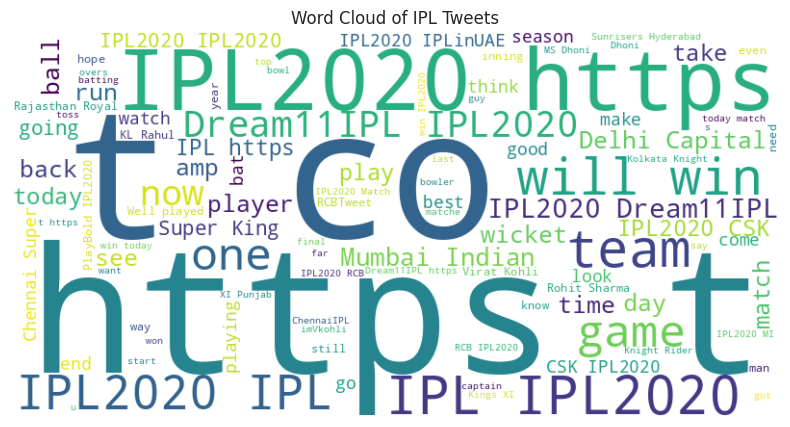

In [ ]:
# Extract the text column and concatenate tweet texts
text_data = ' '.join(df['text'])

# Create a WordCloud instance
wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of IPL Tweets')
plt.show()

So basically we can see ipl 2020 is more used , as hastag or mentioned in the tweets by the users.

### **7.What are the common hashtags used during the tweets?**

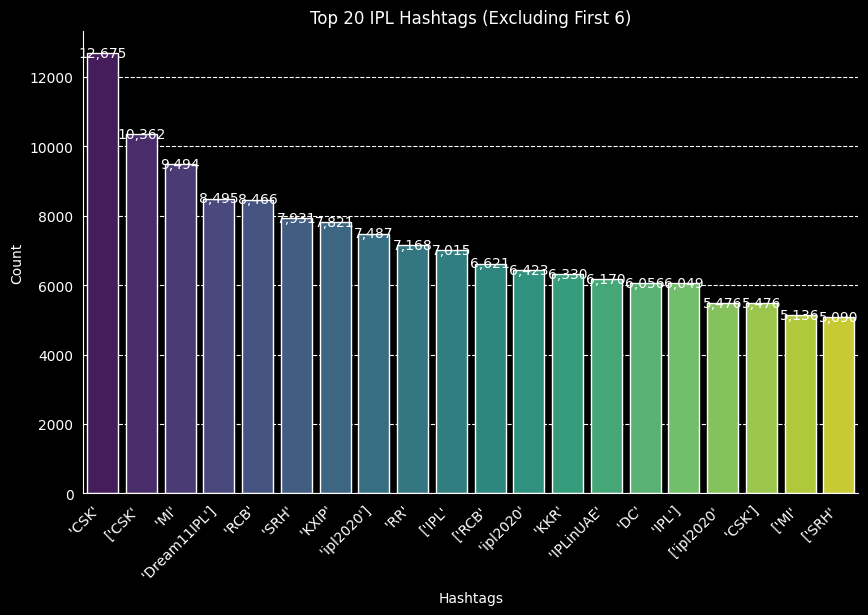

In [ ]:
# Filter rows with non-null hashtags
filtered_df = df[df['hashtags'].notnull()]

# Split hashtags into individual hashtags
hashtags_list = filtered_df['hashtags'].str.split(',')

# Count the occurrences of each hashtag
hashtags_counts = pd.Series([hashtag for hashtags in hashtags_list for hashtag in hashtags]).value_counts()

# Select the top N hashtags and sort them
top_n = 20
top_hashtags = hashtags_counts.iloc[6:].head(top_n).sort_values(ascending=False)

# Set a dark theme
plt.figure(figsize=(10, 6), facecolor='black')
plt.style.use('dark_background')

# Create the bar chart with color customization
bar_plot = sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette="viridis")

# Add data labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', color='white')

plt.xlabel('Hashtags', color='white')
plt.ylabel('Count', color='white')
plt.title('Top {} IPL Hashtags (Excluding First 6)'.format(top_n), color='white')
plt.xticks(rotation=45, ha='right', color='white')

# Adding grid lines and removing top and right spines
plt.grid(axis='y', linestyle='--', color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set the color of tick labels to white
plt.tick_params(colors='white')

# Set the color of title and axis labels to white
plt.title('Top {} IPL Hashtags (Excluding First 6)'.format(top_n), color='white')
plt.xlabel('Hashtags', color='white')
plt.ylabel('Count', color='white')

plt.show()



***From the above plot we can see that CSK is the most prominent team on Twitter, with users employing the CSK hashtag more frequently than any other team in the list.***

### **8.What is the nature of the relationship between user friends ,user followers, user favorites?**

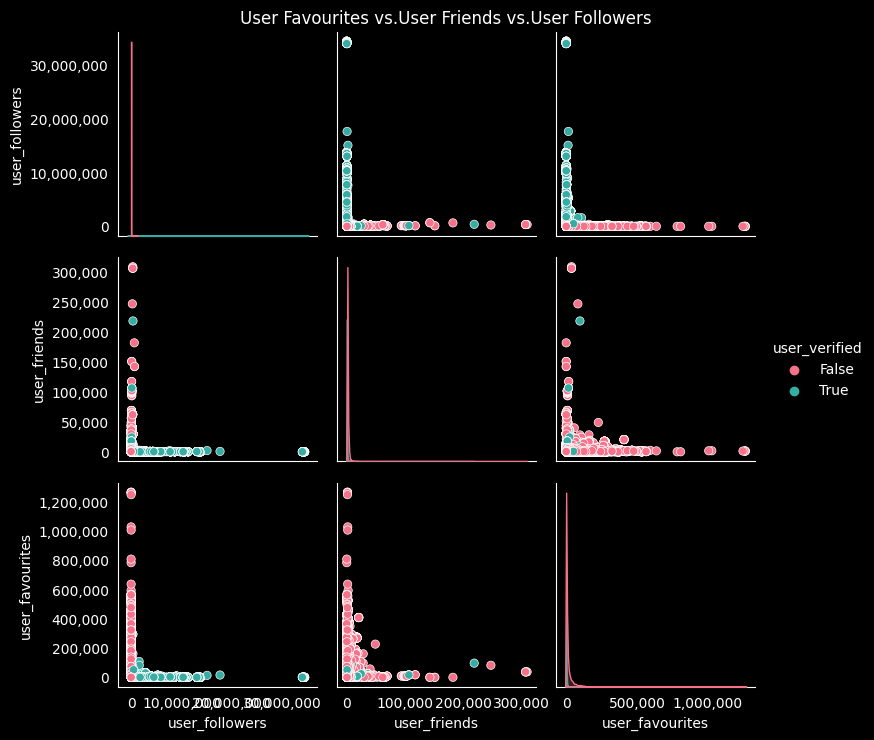

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

# Scatter plot matrix for selected numeric columns with 'user_verified' as the hue
numeric_columns = ['user_followers', 'user_friends', 'user_favourites']
g = sns.pairplot(df, hue='user_verified', vars=numeric_columns, diag_kind='kde', markers='o', palette='husl')

# Format tick labels on the axes to show numbers, not in exponential notation
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
# Add a title to the pair plot
plt.subplots_adjust(top=0.95)
g.fig.suptitle('User Favourites vs.User Friends vs.User Followers')

plt.show()

- User Followers vs. User Friends: This plot shows the relationship between the number of followers and the number of friends a user has. If there's a clear pattern or trend in the points, it indicates a relationship between these two variables. For example, if there's a positive linear trend, it means that users with more followers tend to have more friends.
- User Followers vs. User Favorites: This plot examines the relationship between the number of followers and the number of favorites a user has given. A trend here might suggest that users with more followers tend to favorite more tweets.
- User Friends vs. User Favorites: This plot looks at the relationship between the number of friends and the number of favorites a user has given. Patterns may indicate whether users with more friends tend to favorite more tweets.

### So some key Insights:
User Verification:

- A significant portion of users in the dataset are not verified, with a smaller proportion being verified accounts.
User Relationships:

- There is a positive correlation between the number of user followers and user friends, indicating that users with more followers tend to follow more accounts.
Tweet Sources:

- The top 10 sources for tweets include various clients and platforms from which users are posting.
User Followers Distribution:

- The distribution of user followers is right-skewed, with a few users having a significantly higher number of followers.
User Verification and Followers:

- Verified users tend to have a higher median number of followers compared to non-verified users.
Monthly Tweet Trends:

- There is a visible upward trend in the number of tweets posted over the months, with peaks at certain times.
Correlation Between Numeric Columns:

- There is a positive correlation between 'user_followers' and 'user_friends,' suggesting a relationship between the two user metrics.

## References:

* https://www.kaggle.com/datasets/sarfarazmulla/google-data-analytics-capstone-cyclistic
* https://pandas.pydata.org/docs/user_guide/index.html
* https://matplotlib.org/3.3.1/users/index.html
* https://seaborn.pydata.org/tutorial.html
* https://github.com/JovianML/opendatasets
* https://stackoverflow.com
* https://plotly.com/python
* https://www.geeksforgeeks.org
* https://medium.com

# Future works
As a next step, we can do below.
1. We can do more detailed analysis on complete dataset of 5+M rows.
2. We can analyze emoji, special characters used during the tweets.
4.  We can analyse the whether promating ads during the ipl season is good or bad.

## Conclusion
Overall, the EDA and visualizations provide valuable insights into user-related data, tweet sources, and trends. Further analysis or additional questions can help uncover more insights or patterns in the dataset.